In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:


# List of file names and their corresponding years
files_and_years = {
    'Principal_Commodity_wise_export_201718.csv': '2017-18',
    'Principal_Commodity_wise_export_201819.csv': '2018-19',
    'Principal_Commodity_wise_export_201920.csv': '2019-20',
    'Principal_Commodity_wise_export_202122.csv': '2021-22',
    'Principal_Commodity_wise_export_202223.csv': '2022-23'
}

# Create a list to hold the individual dataframes
dfs = []

# Loop through the files, add a 'Year' column, and append to the list
for file, year in files_and_years.items():
    try:
        df = pd.read_csv(file)
        df['Year'] = year
        dfs.append(df)
    except FileNotFoundError:
        print(f"Warning: File '{file}' not found. Skipping.")
    except Exception as e:
        print(f"An error occurred while processing {file}: {e}")


# Concatenate all dataframes in the list into a single dataframe
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)

    # Display the first few rows of the combined dataframe
    print("Successfully combined the files! Here's a preview of the combined data:")
    print(combined_df.head())

    # Save the combined dataframe to a new CSV file
    combined_df.to_csv('combined_export_data.csv', index=False)
    print("\nThe combined data has been saved to 'combined_export_data.csv'")
else:
    print("No dataframes were created. Please check the file paths and try again.")


Successfully combined the files! Here's a preview of the combined data:
  COMMODITY      COUNTRY UNIT  QUANTITY  VALUE(US$ million)     Year
0       TEA  AFGHANISTAN  KGS  996994.0                2.88  2017-18
1       TEA      ALBANIA  KGS  250065.0                0.82  2017-18
2       TEA      ALGERIA  KGS  109640.0                0.21  2017-18
3       TEA      ANDORRA  KGS   32692.0                0.15  2017-18
4       TEA       ANGOLA  KGS   11361.0                0.07  2017-18

The combined data has been saved to 'combined_export_data.csv'


In [3]:
df = pd.read_csv('combined_export_data.csv')
df.head()

,COMMODITY,COUNTRY,UNIT,QUANTITY,VALUE(US$ million),Year
0,TEA,AFGHANISTAN,KGS,996994.0,2.88,2017-18
1,TEA,ALBANIA,KGS,250065.0,0.82,2017-18
2,TEA,ALGERIA,KGS,109640.0,0.21,2017-18
3,TEA,ANDORRA,KGS,32692.0,0.15,2017-18
4,TEA,ANGOLA,KGS,11361.0,0.07,2017-18


In [4]:
df.shape

(114055, 6)

In [5]:
#Changing the column names for conviniance 
new_names = ['Commodity', 'Country', 'Unit', 'Quantity', 'Value_USD_Million', 'Fiscal_Year']
df.columns = new_names
df.head()

,Commodity,Country,Unit,Quantity,Value_USD_Million,Fiscal_Year
0,TEA,AFGHANISTAN,KGS,996994.0,2.88,2017-18
1,TEA,ALBANIA,KGS,250065.0,0.82,2017-18
2,TEA,ALGERIA,KGS,109640.0,0.21,2017-18
3,TEA,ANDORRA,KGS,32692.0,0.15,2017-18
4,TEA,ANGOLA,KGS,11361.0,0.07,2017-18


In [6]:
#General information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114055 entries, 0 to 114054
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Commodity          114055 non-null  object 
 1   Country            114050 non-null  object 
 2   Unit               67751 non-null   object 
 3   Quantity           67784 non-null   float64
 4   Value_USD_Million  114055 non-null  float64
 5   Fiscal_Year        114055 non-null  object 
dtypes: float64(2), object(4)
memory usage: 5.2+ MB


In [7]:
#Statistical summary of numeric columns
df.describe()

,Quantity,Value_USD_Million
count,6.778400e+04,114055.000000
mean,8.378745e+06,31.915085
std,4.811548e+08,2448.060409
min,0.000000e+00,0.000000
25%,9.800000e+01,0.015000
50%,6.727000e+03,0.265000
75%,2.339732e+05,2.820000
max,8.872187e+10,451070.000000


### New dataframe containing all the records having atleast one null value across the columns

In [9]:
df_null = df[df.isnull().any(axis=1)]

In [10]:
df_null

,Commodity,Country,Unit,Quantity,Value_USD_Million,Fiscal_Year
907,TOBACCO MANUFACTURED,AFGHANISTAN,N .A,NaN,56.54,2017-18
908,TOBACCO MANUFACTURED,ALBANIA,N .A,NaN,0.57,2017-18
909,TOBACCO MANUFACTURED,ANGOLA,N .A,NaN,0.00,2017-18
910,TOBACCO MANUFACTURED,ARGENTINA,N .A,NaN,0.02,2017-18
911,TOBACCO MANUFACTURED,ARUBA,N .A,NaN,0.09,2017-18
...,...,...,...,...,...,...
114038,"WOLLEN YARN,FABRICS,MADEUPSETC ...",VIETNAM SOC REP,NaN,NaN,4.01,2022-23
114039,"WOLLEN YARN,FABRICS,MADEUPSETC ...",YEMEN REPUBLC,NaN,NaN,0.35,2022-23
114040,"WOLLEN YARN,FABRICS,MADEUPSETC ...",ZAMBIA,NaN,NaN,0.00,2022-23
114041,"WOLLEN YARN,FABRICS,MADEUPSETC ...",ZIMBABWE,NaN,NaN,0.00,2022-23


### Removing the rows with values TOTAL or Total

In [12]:
df = df[~((df == 'TOTAL') | (df == 'Total')).any(axis=1)]
print(df[df['Commodity'] == 'TOTAL'])
print(df[df['Commodity'] == 'Total'])
print(df[df['Commodity'] == 'total'])

Empty DataFrame
Columns: [Commodity, Country, Unit, Quantity, Value_USD_Million, Fiscal_Year]
Index: []
Empty DataFrame
Columns: [Commodity, Country, Unit, Quantity, Value_USD_Million, Fiscal_Year]
Index: []
Empty DataFrame
Columns: [Commodity, Country, Unit, Quantity, Value_USD_Million, Fiscal_Year]
Index: []


### Exploring each columns

In [14]:
df['Commodity'].unique()

array(['TEA', 'COFFEE', 'RICE -BASMOTI', 'RICE(OTHER THAN BASMOTI)',
       'WHEAT', 'OTHER CEREALS', 'PULSES', 'TOBACCO UNMANUFACTURED',
       'TOBACCO MANUFACTURED', 'SPICES', 'CASHEW',
       'CASHEW NUT SHELL LIQUID', 'SESAME SEEDS', 'NIGER SEEDS',
       'GROUNDNUT', 'OTHER OIL SEEDS', 'VEGETABLE OILS', 'OIL MEALS',
       'GUERGAM MEAL', 'CASTOR OIL', 'SHELLAC', 'SUGAR', 'MOLLASES',
       'FRUITS / VEGETABLE SEEDS', 'FRESH FRUITS', 'FRESH VEGETABLES',
       'PROCESSED VEGETABLES', 'PROCESSED FRUITS AND JUICES',
       'CEREAL PREPARATIONS', 'COCOA PRODUCTS', 'MILLED PRODUCTS',
       'MISC PROCESSED ITEMS', 'ANIMAL CASINGS', 'BUFFALO MEAT',
       'SHEEP/GOAT MEAT', 'OTHER MEAT', 'PROCESSED MEAT',
       'DAIRY PRODUCTS', 'POULTRY PRODUCTS', 'FLORICLTR PRODUCTS',
       'NATURAL RUBBER', 'ALCOHOLIC BEVERAGES', 'MARINE PRODUCTS',
       'IRON ORE', 'MICA', 'COAL,COKE AND BRIQUITTES ETC',
       'BULK MINERALS AND ORES', 'GRANIT, NATRL STONE AND PRODCT',
       'PROCESSED MINERA

In [15]:
#Removing trailing whitespaces from some values
df['Commodity'] = df['Commodity'].str.strip()

In [16]:
df['Commodity'].unique()

array(['TEA', 'COFFEE', 'RICE -BASMOTI', 'RICE(OTHER THAN BASMOTI)',
       'WHEAT', 'OTHER CEREALS', 'PULSES', 'TOBACCO UNMANUFACTURED',
       'TOBACCO MANUFACTURED', 'SPICES', 'CASHEW',
       'CASHEW NUT SHELL LIQUID', 'SESAME SEEDS', 'NIGER SEEDS',
       'GROUNDNUT', 'OTHER OIL SEEDS', 'VEGETABLE OILS', 'OIL MEALS',
       'GUERGAM MEAL', 'CASTOR OIL', 'SHELLAC', 'SUGAR', 'MOLLASES',
       'FRUITS / VEGETABLE SEEDS', 'FRESH FRUITS', 'FRESH VEGETABLES',
       'PROCESSED VEGETABLES', 'PROCESSED FRUITS AND JUICES',
       'CEREAL PREPARATIONS', 'COCOA PRODUCTS', 'MILLED PRODUCTS',
       'MISC PROCESSED ITEMS', 'ANIMAL CASINGS', 'BUFFALO MEAT',
       'SHEEP/GOAT MEAT', 'OTHER MEAT', 'PROCESSED MEAT',
       'DAIRY PRODUCTS', 'POULTRY PRODUCTS', 'FLORICLTR PRODUCTS',
       'NATURAL RUBBER', 'ALCOHOLIC BEVERAGES', 'MARINE PRODUCTS',
       'IRON ORE', 'MICA', 'COAL,COKE AND BRIQUITTES ETC',
       'BULK MINERALS AND ORES', 'GRANIT, NATRL STONE AND PRODCT',
       'PROCESSED MINERA

In [17]:
df['Country'].unique()

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANDORRA', 'ANGOLA',
       'ARGENTINA', 'ARMENIA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN',
       'BAHARAIN IS', 'BANGLADESH PR', 'BARBADOS', 'BELARUS', 'BELGIUM',
       'BENIN', 'BHUTAN', 'BOTSWANA', 'BRAZIL', 'BRUNEI', 'BULGARIA',
       'BURKINA FASO', 'CAMBODIA', 'CAMEROON', 'CANADA', 'CAYMAN IS',
       'CHAD', 'CHILE', 'CHINA P RP', 'COLOMBIA', 'CONGO D. REP.',
       'CONGO P REP', 'COSTA RICA', "COTE D' IVOIRE", 'CROATIA', 'CYPRUS',
       'CZECH REPUBLIC', 'DENMARK', 'DOMINIC REP', 'ECUADOR',
       'EGYPT A RP', 'ESTONIA', 'ETHIOPIA', 'FIJI IS', 'FINLAND',
       'FRANCE', 'GABON', 'GAMBIA', 'GEORGIA', 'GERMANY', 'GHANA',
       'GREECE', 'GUADELOUPE', 'GUATEMALA', 'GUINEA', 'GUINEA BISSAU',
       'GUYANA', 'HAITI', 'HONG KONG', 'HUNGARY', 'INDONESIA', 'IRAN',
       'IRAQ', 'IRELAND', 'ISRAEL', 'ITALY', 'JAMAICA', 'JAPAN', 'JORDAN',
       'KAZAKHSTAN', 'KENYA', 'KOREA DP RP', 'KOREA RP', 'KUWAIT',
       'KYRGHYZSTAN', 'LAO PD RP

In [18]:
print(f'Unique Unit values: {df['Unit'].unique()}')

print(df[(df['Unit'] == "N .A") & (df['Fiscal_Year'] != "2017-18")])
#This confirms that only records for the year 2017-18 has N.A values, Though I will not be removing rows based on Unit as I am not considering it as a primary feature

#Some more insights, Calculating missing and nan Unit values
missingUnit = df['Unit'].value_counts()['N .A']
nanUnit = df['Unit'].isna().sum()

print(f'No. of records having "N .A" values: {missingUnit}')
print(f'No. of records having NaN values: {nanUnit}')
print(f'Total percentage of records having either missing or nan Unit values: {(missingUnit + nanUnit)/len(df)*100:.2f}%')

Unique Unit values: ['KGS' 'TON' 'N .A' 'LTR' 'NOS' 'SQM' nan]
Empty DataFrame
Columns: [Commodity, Country, Unit, Quantity, Value_USD_Million, Fiscal_Year]
Index: []
No. of records having "N .A" values: 11477
No. of records having NaN values: 46299
Total percentage of records having either missing or nan Unit values: 50.66%


In [19]:
print(df['Quantity'].value_counts())
print(f'Count of NaN values : {df['Quantity'].isna().sum()}')
#Not considering 0.0 as missing values as it could simply mean that that commodity was not exported 

Quantity
0.0        6033
1.0        1226
2.0         748
3.0         471
5.0         429
           ... 
3572.0        1
10911.0       1
6953.0        1
17273.0       1
4049.0        1
Name: count, Length: 36404, dtype: int64
Count of NaN values : 46268


In [20]:
print(df['Value_USD_Million'].value_counts())
#Again NOT considering 0.0 values as missing

Value_USD_Million
0.000     19225
0.010      5846
0.020      3308
0.030      2476
0.040      1953
          ...  
5.982         1
5.163         1
5.601         1
1.044         1
86.480        1
Name: count, Length: 14770, dtype: int64


In [21]:
df.isna().sum()

Commodity                0
Country                  0
Unit                 46299
Quantity             46268
Value_USD_Million        0
Fiscal_Year              0
dtype: int64

In [22]:
#Cheking for records where Quantity is NaN and Value is 0, if so, replacing those Quantity NaN value with 0.0 to consider it as nto exported
df[(df['Quantity'].isna()) & (df['Value_USD_Million'] == 0.0)]

df.loc[(df['Quantity'].isna()) & (df['Value_USD_Million'] == 0.0), 'Quantity'] = 0.0

print(f'After replacing NaN with 0 in Quantity: {df[(df['Quantity'].isna()) & (df['Value_USD_Million'] == 0.0)]}')

After replacing NaN with 0 in Quantity: Empty DataFrame
Columns: [Commodity, Country, Unit, Quantity, Value_USD_Million, Fiscal_Year]
Index: []


In [23]:
#Current NaN values
df.isna().sum()

Commodity                0
Country                  0
Unit                 46299
Quantity             38616
Value_USD_Million        0
Fiscal_Year              0
dtype: int64

In [24]:
print(f'We will lose {df['Quantity'].isna().sum()/len(df)*100:.2f}% of the total data')

We will lose 33.86% of the total data


In [25]:
df_cleaned = df[~df['Quantity'].isna()]
print(df_cleaned.head())
print(df_cleaned.isna().sum())

  Commodity      Country Unit  Quantity  Value_USD_Million Fiscal_Year
0       TEA  AFGHANISTAN  KGS  996994.0               2.88     2017-18
1       TEA      ALBANIA  KGS  250065.0               0.82     2017-18
2       TEA      ALGERIA  KGS  109640.0               0.21     2017-18
3       TEA      ANDORRA  KGS   32692.0               0.15     2017-18
4       TEA       ANGOLA  KGS   11361.0               0.07     2017-18
Commodity                0
Country                  0
Unit                 17521
Quantity                 0
Value_USD_Million        0
Fiscal_Year              0
dtype: int64


## Cleaned dataframe

In [26]:
df_cleaned.shape

(75434, 6)

In [27]:
df = df_cleaned.copy()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75434 entries, 0 to 114053
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Commodity          75434 non-null  object 
 1   Country            75434 non-null  object 
 2   Unit               57913 non-null  object 
 3   Quantity           75434 non-null  float64
 4   Value_USD_Million  75434 non-null  float64
 5   Fiscal_Year        75434 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.0+ MB


In [58]:
### Top exported commodity by value

<Axes: xlabel='Commodity'>

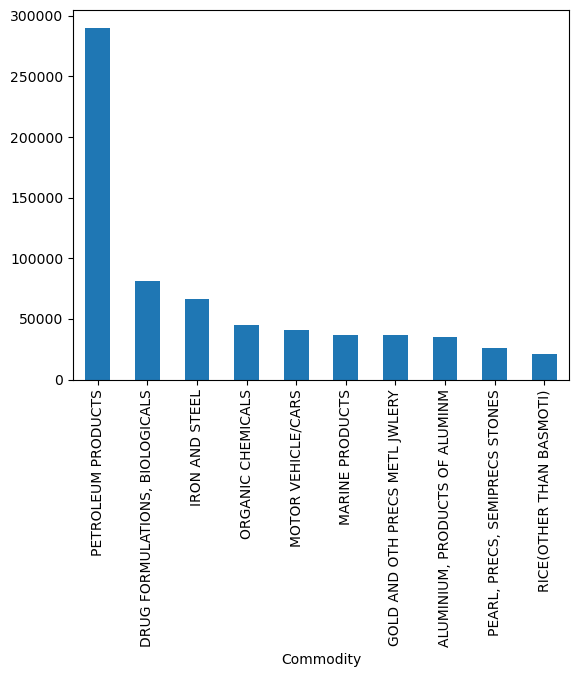

In [62]:
top_commodities = df.groupby('Commodity')['Value_USD_Million'].sum().sort_values(ascending=False).head(10)
top_commodities.plot(kind='bar')